# ESERCIZIO 12.2 E 12.3
In questa lezione abbiamo utilizzato la libreria Keras di python per creare una CNN (rete neurale convoluzionale) che esegua OCR (optical character recognition). <br>
Una CNN è una rete neurale le cui proprietà rimangono invariate per traslazioni e utilizza layer bidimensionali. <br>
La rete prende in ingresso un immagine in scala di grigi di 28x28 pixel e restituisce un numero da 0 a 9 corrispondente al carattere rappresentato nell'immagine.<br>
I layer di tipo pool servono a ridurre la dimensione del problema: un max-pooling di 4 dati (2x2) ad esempio dà in output un solo dato, il massimo tra i 4 in ingresso.

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)

60000 train samples
10000 test samples


In [3]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(16, kernel_size=(5,5)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Dense(10, activation='softmax'))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model


def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    
    return model

In [9]:
# training parameters
batch_size = 64
epochs = 6

# create the deep conv net
model_CNN=create_CNN()
model_DNN=create_DNN()

# train CNN
print("MODELLO CNN")
history= model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


MODELLO CNN
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 14s 232us/step - loss: 0.5556 - accuracy: 0.8360 - val_loss: 0.2223 - val_accuracy: 0.9374
Epoch 2/6
60000/60000 [==============================] - 13s 222us/step - loss: 0.1984 - accuracy: 0.9404 - val_loss: 0.1509 - val_accuracy: 0.9554
Epoch 3/6
60000/60000 [==============================] - 13s 222us/step - loss: 0.1451 - accuracy: 0.9570 - val_loss: 0.1201 - val_accuracy: 0.9619
Epoch 4/6
60000/60000 [==============================] - 13s 222us/step - loss: 0.1189 - accuracy: 0.9650 - val_loss: 0.1033 - val_accuracy: 0.9677
Epoch 5/6
60000/60000 [==============================] - 13s 223us/step - loss: 0.1023 - accuracy: 0.9695 - val_loss: 0.0917 - val_accuracy: 0.9707
Epoch 6/6
60000/60000 [==============================] - 13s 224us/step - loss: 0.0918 - accuracy: 0.9725 - val_loss: 0.0809 - val_accuracy: 0.9732


10000/10000 [==============================] - 1s 99us/step

Test loss: 0.08091002118904143
Test accuracy: 0.9732000231742859


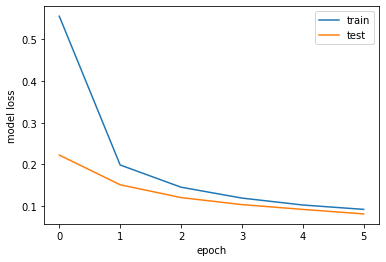

In [10]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

(28, 28, 3)
(28, 28)
Digit predicted:    3


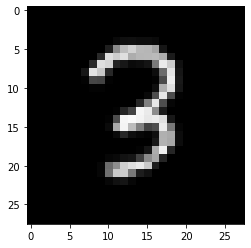

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('foto_numeri/3.png')
print(img.shape)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray=rgb2gray(img)
print(gray.shape)
gray = gray.reshape(1,28,28,1)
pred = model_CNN.predict(gray)
print("Digit predicted:    {}".format(np.argmax(pred)))
imgplot = plt.imshow(img)
plt.show()